In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the data
df_train = pd.read_csv("/content/fraudTrain.csv")
df_test = pd.read_csv("/content/fraudTest.csv")

In [ ]:
# shapes
print(df_train.shape[0])
print(df_test.shape[0])

8167
12245


In [ ]:
# Combining the datasets
df = pd.concat([df_train, df_test])
df.shape[0]

20412

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


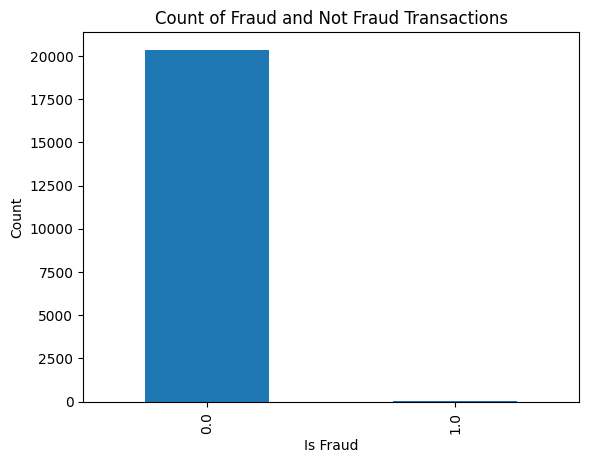

In [ ]:
# Visualizing the imbalance in the dataset
df.groupby("is_fraud").count()["cc_num"].plot(kind="bar")
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.title('Count of Fraud and Not Fraud Transactions')
plt.show()


In [ ]:
# Resampling the data to handle imbalance
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])

59
20351


In [ ]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud])

<Axes: xlabel='is_fraud'>

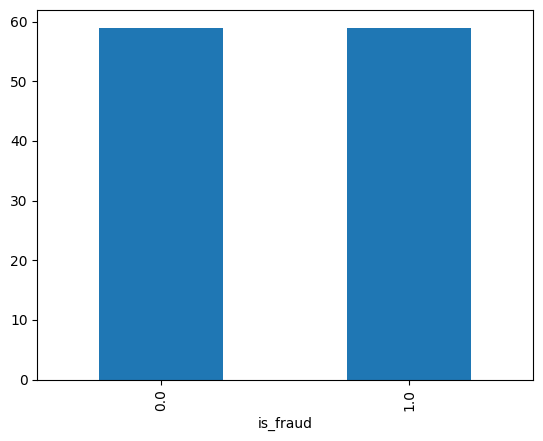

In [ ]:
df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1685 to 3050
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             118 non-null    int64  
 1   trans_date_trans_time  118 non-null    object 
 2   cc_num                 118 non-null    float64
 3   merchant               118 non-null    object 
 4   category               118 non-null    object 
 5   amt                    118 non-null    float64
 6   first                  118 non-null    object 
 7   last                   118 non-null    object 
 8   gender                 118 non-null    object 
 9   street                 118 non-null    object 
 10  city                   118 non-null    object 
 11  state                  118 non-null    object 
 12  zip                    118 non-null    float64
 13  lat                    118 non-null    float64
 14  long                   118 non-null    float64
 15  city_po

In [ ]:
useless_cols = [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time'
]

# Dropping the columns
df_new.drop(columns=useless_cols, inplace=True)

In [ ]:
df_new.isna().sum().sum()

0

In [ ]:
df_new.duplicated().sum()

23

In [ ]:
df_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
1685,health_fitness,24.84,Notrees,TX,31.8599,-102.7413,23.0,15-09-1969,1.0
1767,misc_net,780.52,Benton,WI,42.5545,-90.3508,1306.0,10-09-1958,1.0
1781,entertainment,620.33,Benton,WI,42.5545,-90.3508,1306.0,10-09-1958,1.0
1784,shopping_net,1077.69,Denham Springs,LA,30.4590,-90.9027,71335.0,31-05-1994,1.0
1857,shopping_pos,842.65,Notrees,TX,31.8599,-102.7413,23.0,15-09-1969,1.0
...,...,...,...,...,...,...,...,...,...
1629,misc_pos,5.88,Red River,NM,36.6659,-105.4694,606.0,06-09-1988,0.0
5619,personal_care,57.54,Mount Clemens,MI,42.5978,-82.8823,16305.0,25-05-1927,0.0
3982,food_dining,7.60,Manley,NE,40.9207,-96.1680,206.0,04-10-1967,0.0
6707,grocery_net,53.95,Haw River,NC,36.0424,-79.3242,6006.0,20-07-1984,0.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1685 to 3050
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  118 non-null    object 
 1   amt       118 non-null    float64
 2   city      118 non-null    object 
 3   state     118 non-null    object 
 4   lat       118 non-null    float64
 5   long      118 non-null    float64
 6   city_pop  118 non-null    float64
 7   dob       118 non-null    object 
 8   is_fraud  118 non-null    float64
dtypes: float64(5), object(4)
memory usage: 9.2+ KB


Feature Engineering 🛠️
we will create new features that can help improve the performance of our models.

In [ ]:
df_new["dob"] = pd.to_datetime(df_new["dob"])

<ipython-input-17-5e573c0ddd0b>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_new["dob"] = pd.to_datetime(df_new["dob"])


In [ ]:
from datetime import datetime
df_new["dob"] = df_new["dob"].dt.year
df_new['dob'] = datetime.now().year - df_new['dob']
df_new = df_new.rename(columns = {"dob" : "age"})
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
1685,health_fitness,24.84,Notrees,TX,31.8599,-102.7413,23.0,55,1.0
1767,misc_net,780.52,Benton,WI,42.5545,-90.3508,1306.0,66,1.0
1781,entertainment,620.33,Benton,WI,42.5545,-90.3508,1306.0,66,1.0
1784,shopping_net,1077.69,Denham Springs,LA,30.4590,-90.9027,71335.0,30,1.0
1857,shopping_pos,842.65,Notrees,TX,31.8599,-102.7413,23.0,55,1.0
...,...,...,...,...,...,...,...,...,...
1629,misc_pos,5.88,Red River,NM,36.6659,-105.4694,606.0,36,0.0
5619,personal_care,57.54,Mount Clemens,MI,42.5978,-82.8823,16305.0,97,0.0
3982,food_dining,7.60,Manley,NE,40.9207,-96.1680,206.0,57,0.0
6707,grocery_net,53.95,Haw River,NC,36.0424,-79.3242,6006.0,40,0.0


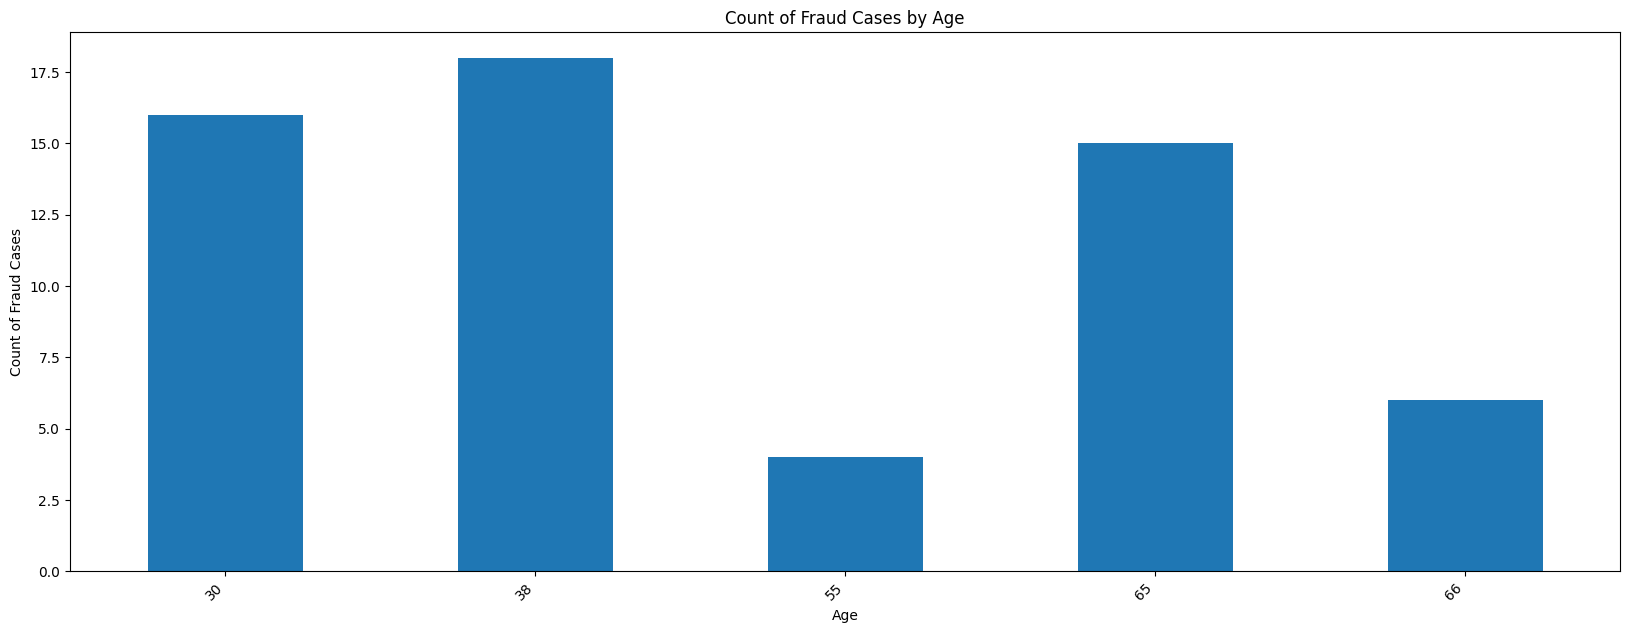

In [ ]:
plt.figure(figsize=(20, 7))
ax = df_new[df_new['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
numeric_columns = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype =='int32' or df_new[i].dtype =='float64']
categorical_columns = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [ ]:
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    df_new[col] = encoder.fit_transform(df_new[col])
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
1685,5,24.84,43,25,31.8599,-102.7413,23.0,55,1.0
1767,8,780.52,6,29,42.5545,-90.3508,1306.0,66,1.0
1781,0,620.33,6,29,42.5545,-90.3508,1306.0,66,1.0
1784,11,1077.69,15,9,30.4590,-90.9027,71335.0,30,1.0
1857,12,842.65,43,25,31.8599,-102.7413,23.0,55,1.0
...,...,...,...,...,...,...,...,...,...
1629,9,5.88,48,17,36.6659,-105.4694,606.0,36,0.0
5619,10,57.54,40,11,42.5978,-82.8823,16305.0,97,0.0
3982,1,7.60,38,15,40.9207,-96.1680,206.0,57,0.0
6707,3,53.95,22,13,36.0424,-79.3242,6006.0,40,0.0


In [ ]:
columns = df_new.columns.tolist()
columns.remove('is_fraud')
X = df_new.drop(['is_fraud'], axis=1)
y = df_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
1685,-0.565239,-0.766901,0.400878,1.257405,-0.749084,-1.728364,-0.500716,0.504545,1.0
1767,0.231951,1.228801,-1.437601,1.724356,0.975686,-0.453378,-0.485178,1.207227,1.0
1781,-1.893890,0.805749,-1.437601,1.724356,0.975686,-0.453378,-0.485178,1.207227,1.0
1784,1.029141,2.013607,-0.990403,-0.610400,-0.975014,-0.510169,0.362922,-1.092459,1.0
1857,1.294871,1.392882,0.400878,1.257405,-0.749084,-1.728364,-0.500716,0.504545,1.0
...,...,...,...,...,...,...,...,...,...
1629,0.497681,-0.816974,0.649321,0.323502,0.026003,-2.009086,-0.493655,-0.709178,0.0
5619,0.763411,-0.680543,0.251812,-0.376925,0.982669,0.315132,-0.303530,3.187512,0.0
3982,-1.628160,-0.812431,0.152435,0.090027,0.712195,-1.051970,-0.498500,0.632305,0.0
6707,-1.096699,-0.690024,-0.642583,-0.143449,-0.074552,0.681261,-0.428258,-0.453657,0.0


Building the Models 🏗️¶
We will build several machine learning models to detect fraudulent transactions. This includes logistic regression, decision trees, random forests, gradient boosting, XGBoost, SVC, KNeighborsClassifier, and GaussianNB.

Models to Build:

Logistic Regression,
Decision Tree,
Random Forest,
Gradient Boosting Machine (GBM),
XGBoost,
Support Vector Classifier (SVC),
K-Nearest Neighbors (KNeighborsClassifier),
Gaussian Naive Bayes (GaussianNB).

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.833333,0.785714,0.916667,0.846154
Decision Tree,0.833333,0.833333,0.833333,0.833333
Random Forest,0.958333,0.923077,1.000000,0.960000
Gradient Boosting,0.958333,0.923077,1.000000,0.960000
XGBoost,0.833333,0.750000,1.000000,0.857143
SVC,0.791667,0.733333,0.916667,0.814815
KNN,0.750000,0.687500,0.916667,0.785714
Naive Bayes,0.875000,0.846154,0.916667,0.880000
AdaBoost,0.916667,0.857143,1.000000,0.923077


In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Evaluating the Models 📈¶
We will evaluate the performance of our models using various metrics such as accuracy, precision, recall, and the F1 score. We will also plot the ROC curves and calculate the AUC.

Evaluation Metrics:

Accuracy,
Precision,
Recall,
F1 Score

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 8  4]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80        12
         1.0       0.75      1.00      0.86        12

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.83        24
weighted avg       0.88      0.83      0.83        24



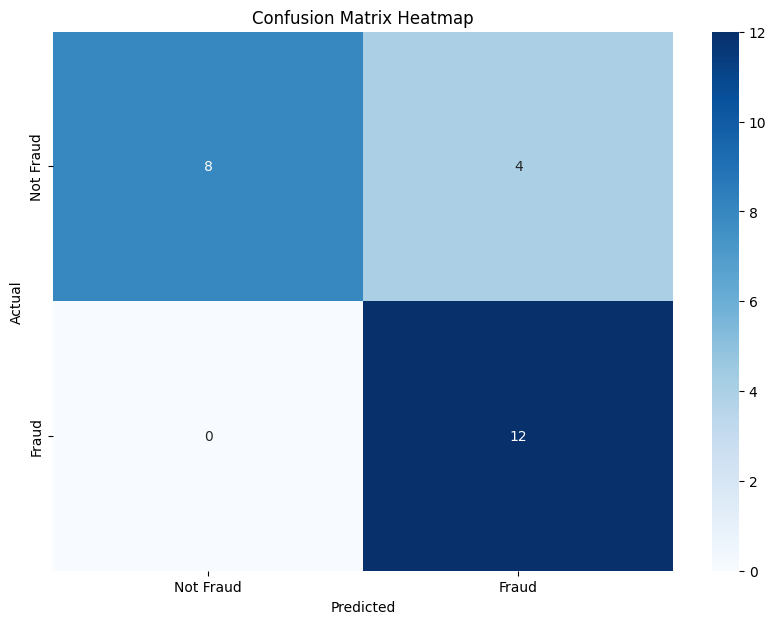

In [ ]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Save the model to a file
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']